In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
names = ['user_id','purchasing_date','quantity','price']
file  = pd.read_csv('CDNOW.txt',sep='\s+',names=names)

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id            69659 non-null int64
purchasing_date    69659 non-null int64
quantity           69659 non-null int64
price              69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
print(file.describe())

            user_id  purchasing_date      quantity         price
count  69659.000000     6.965900e+04  69659.000000  69659.000000
mean   11470.854592     1.997228e+07      2.410040     35.893648
std     6819.904848     3.837735e+03      2.333924     36.281942
min        1.000000     1.997010e+07      1.000000      0.000000
25%     5506.000000     1.997022e+07      1.000000     14.490000
50%    11410.000000     1.997042e+07      2.000000     25.980000
75%    17273.000000     1.997111e+07      3.000000     43.700000
max    23570.000000     1.998063e+07     99.000000   1286.010000


In [5]:
data = file.copy()

In [6]:
data['unit_price'] = data['price']/data['quantity']

In [10]:
print(data.head())

   user_id  purchasing_date  quantity  price  unit_price
0        1         19970101         1  11.77       11.77
1        2         19970112         1  12.00       12.00
2        2         19970112         5  77.00       15.40
3        3         19970102         2  20.76       10.38
4        3         19970330         2  20.76       10.38


In [12]:
data['order_date'] = pd.to_datetime(data.purchasing_date,format='%Y%m%d')

In [14]:
data['month'] = data.order_date.values.astype('datetime64[M]')

In [15]:
user_grouped = data.groupby('user_id').sum()

In [16]:
print(user_grouped.head())

         purchasing_date  quantity   price  unit_price
user_id                                               
1               19970101         1   11.77   11.770000
2               39940224         6   89.00   27.400000
3              119833602        16  156.46   64.250000
4               79882233         7  100.50   57.730000
5              219686137        29  385.61  147.913333


In [17]:
print(user_grouped.describe())

       purchasing_date      quantity         price    unit_price
count     2.357000e+04  23570.000000  23570.000000  23570.000000
mean      5.902627e+07      7.122656    106.080426     45.688994
std       9.460684e+07     16.983531    240.925195     73.850857
min       1.997010e+07      1.000000      0.000000      0.000000
25%       1.997021e+07      1.000000     19.970000     14.370000
50%       1.997032e+07      3.000000     43.395000     24.730000
75%       5.992125e+07      7.000000    106.475000     49.957500
max       4.334408e+09   1033.000000  13990.930000   3623.160218


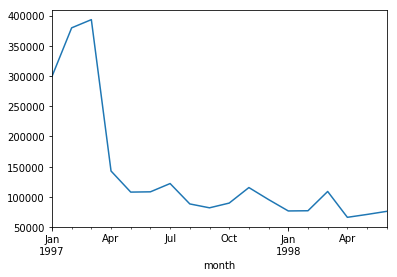

In [18]:
data.groupby('month').price.sum().plot()

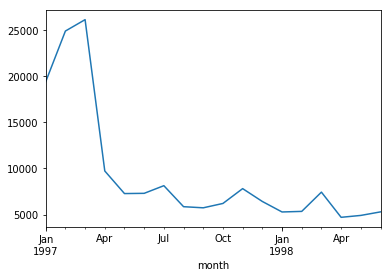

In [19]:
data.groupby('month').quantity.sum().plot()

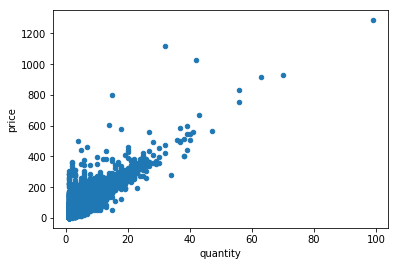

In [20]:
data.plot.scatter(x='quantity',y='price')

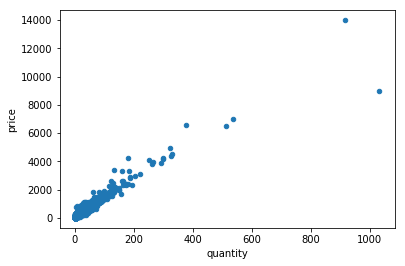

In [21]:
data.groupby('user_id').sum().plot.scatter(x='quantity',y='price')

In [22]:
plt.figure(figsize=(12,4))

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

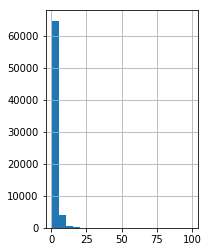

In [23]:
plt.subplot(121)
data.quantity.hist(bins=20)

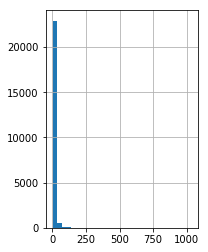

In [24]:
plt.subplot(121)
data.groupby('user_id').quantity.sum().hist(bins=30)

In [25]:
data.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [26]:
data.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [27]:
pivoted_counts = data.pivot_table(index='user_id',columns='month',values='quantity',aggfunc='count').fillna(0)
columns_month = data.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


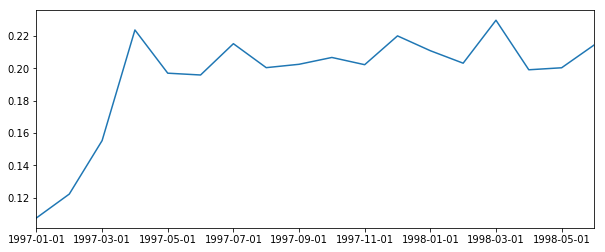

In [30]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))

In [31]:
pivot_price = data.pivot_table(index='user_id',columns='month',values='price',aggfunc='mean').fillna(0)
pivot_price.columns = columns_month

In [32]:
pivot_price.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [33]:
pivot_purchase = pivot_price.applymap(lambda x: 1 if x>0 else 0)
pivot_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [34]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,index=columns_month)

pivoted_purchase_return = pivot_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
